## Init

In [1]:
!pip install pandas
!pip install matplotlib

import pandas

    100% |████████████████████████████████| 10.1MB 167kB/s 
    100% |████████████████████████████████| 512kB 3.5MB/s 
    100% |████████████████████████████████| 17.3MB 114kB/s 
    100% |████████████████████████████████| 13.0MB 135kB/s 
    100% |████████████████████████████████| 71kB 8.7MB/s 
    100% |████████████████████████████████| 92kB 19.8MB/s 


# Cumulative volume

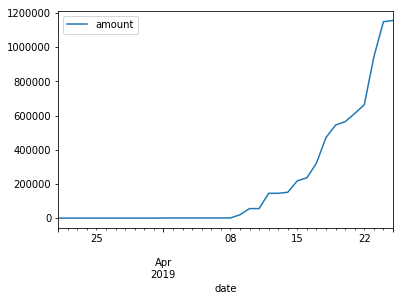

In [3]:
df = pandas.read_csv('results.csv')
df['date'] = pandas.to_datetime(df['date'], unit='ms')
df.index = pandas.to_datetime(df['date'])
df = df.resample('D').sum()
df['amount'] = df['amount'].cumsum()

df.plot()


## Weekly volume

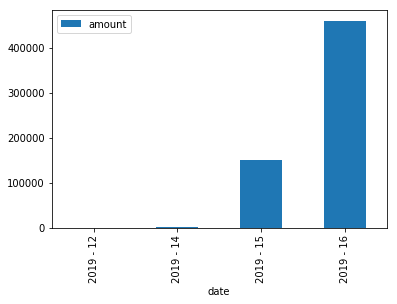

In [13]:
df = pandas.read_csv('results.csv')
df['date'] = pandas.to_datetime(df['date'], unit='ms')
kw_year = lambda x: str(x.year) + ' - ' + str(x.isocalendar()[1])
df = df.groupby(df['date'].map(kw_year), sort=False).agg({'amount': 'sum'})
df.plot.bar()

## Hour of day trade count

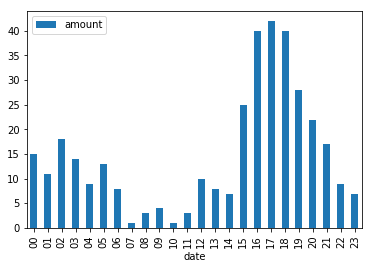

In [8]:
df = pandas.read_csv('results.csv')
df['date'] = pandas.to_datetime(df['date'], unit='ms')
kw_hour = lambda x: str(x.hour).zfill(2)
df = df.groupby(df['date'].map(kw_hour), sort=True).agg({'amount': 'count'})
df.plot.bar()